In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Linear Regression Part 2

* What's we'll cover
  * Predicting Values
  * Linear regression for categorical explanatory variables
  * Linear regression for non-linear data
    * Transforming variables
  * Assessing the fit



In [3]:
# Data obtained here: https://www.kaggle.com/aungpyaeap/fish-market

fish_data = read_csv("./data/fish_info.csv")
fish_data

Rows: 159 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (4): Weight, Length, Height, Width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bream,242,23.2,11.5200,4.0200
Bream,290,24.0,12.4800,4.3056
Bream,340,23.9,12.3778,4.6961
Bream,363,26.3,12.7300,4.4555
Bream,430,26.5,12.4440,5.1340
Bream,450,26.8,13.6024,4.9274
Bream,500,26.8,14.1795,5.2785
Bream,390,27.6,12.6700,4.6900
Bream,450,27.6,14.0049,4.8438


Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pike,1250,52,10.6863,6.9849
Pike,1600,56,9.6000,6.1440
Pike,1550,56,9.6000,6.1440
Pike,1650,59,10.8120,7.4800


### Usign `dplyr`'s' `filter`

* `dplyr` provides some very useful functions to wrangle data.
* `filter` is a useful function to subset data
  * Takes a condition on which to filter
    * Condition should evaluate to True or False
  * Return (keep) a line if its condition evaluates to True
* For example:


```R
 filter(fish_data, Species== "Bream")
```
or, using the pipeline syntax:
```R
fish_data %>% filter(Species== "Bream")
```


* Note the `conditional` operator `==`, which tests for equality

In [6]:
head(filter(fish_data, Species== "Bream"))

Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bream,242,23.2,11.5200,4.0200
Bream,290,24.0,12.4800,4.3056
Bream,340,23.9,12.3778,4.6961
Bream,363,26.3,12.7300,4.4555
Bream,430,26.5,12.4440,5.1340
Bream,450,26.8,13.6024,4.9274


In [7]:
fish_data %>% filter(Species== "Bream")

Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bream,242,23.2,11.5200,4.0200
Bream,290,24.0,12.4800,4.3056
Bream,340,23.9,12.3778,4.6961
Bream,363,26.3,12.7300,4.4555
Bream,430,26.5,12.4440,5.1340
Bream,450,26.8,13.6024,4.9274
Bream,500,26.8,14.1795,5.2785
Bream,390,27.6,12.6700,4.6900
Bream,450,27.6,14.0049,4.8438


In [8]:
fish_data %>% filter(Length > 50)

Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pike,1250,52,10.6863,6.9849
Pike,1600,56,9.6000,6.1440
Pike,1550,56,9.6000,6.1440
Pike,1650,59,10.8120,7.4800


In [9]:
bream_weight = fish_data %>% filter(Species== "Bream")
lm_weight_bream = lm(Weight ~ Length, bream_weight)
lm_weight_bream


Call:
lm(formula = Weight ~ Length, data = bream_weight)

Coefficients:
(Intercept)       Length  
   -1035.35        54.55  


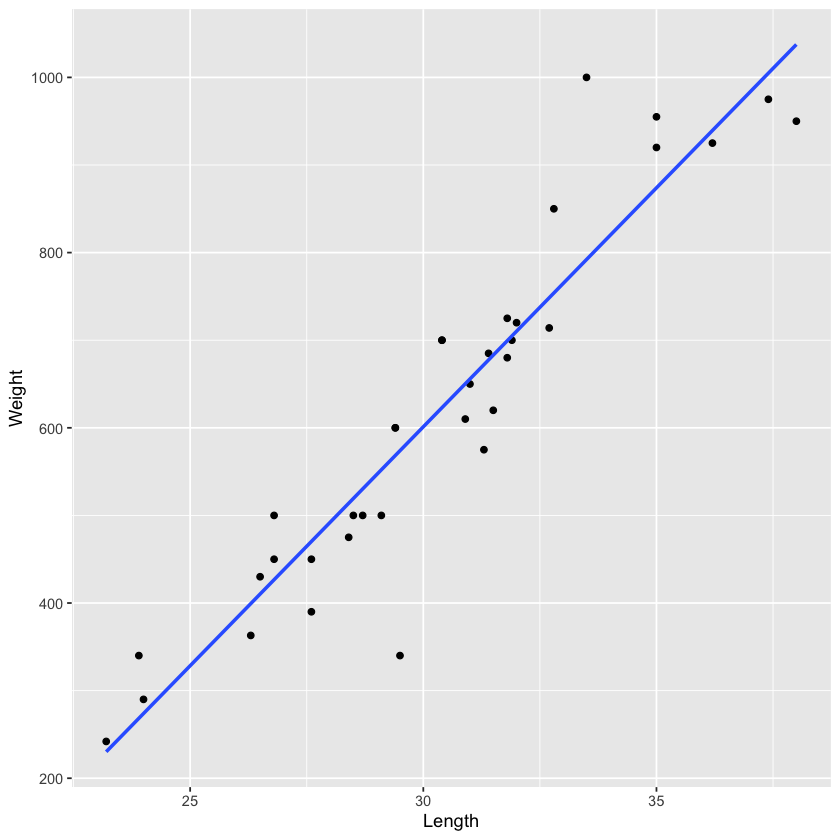

In [10]:
ggplot(bream_weight, aes(x=Length, y=Weight))+
  geom_point() + 
  geom_smooth(formula = y ~ x,method="lm", se=FALSE) 
  

In [20]:
new_weight_data = tibble(Length= c(seq(20,40, 5),1))
new_weight_data 

Length
<dbl>
20
25
30
35
40
1


In [14]:
predictions = predict(lm_weight_bream, new_weight_data)
predictions

1          2          3          4          5          6 
  55.65205  328.40196  601.15186  873.90177 1146.65167 -980.79758

In [15]:
cbind(new_weight_data, Weight=predictions)

,Length,Weight
,<dbl>,<dbl>
1,20,55.65205
2,25,328.40196
3,30,601.15186
4,35,873.90177
5,40,1146.65167
6,1,-980.79758


In [16]:
prediction_data = cbind(new_weight_data, Weight=predictions)
prediction_data 

,Length,Weight
,<dbl>,<dbl>
1,20,55.65205
2,25,328.40196
3,30,601.15186
4,35,873.90177
5,40,1146.65167
6,1,-980.79758


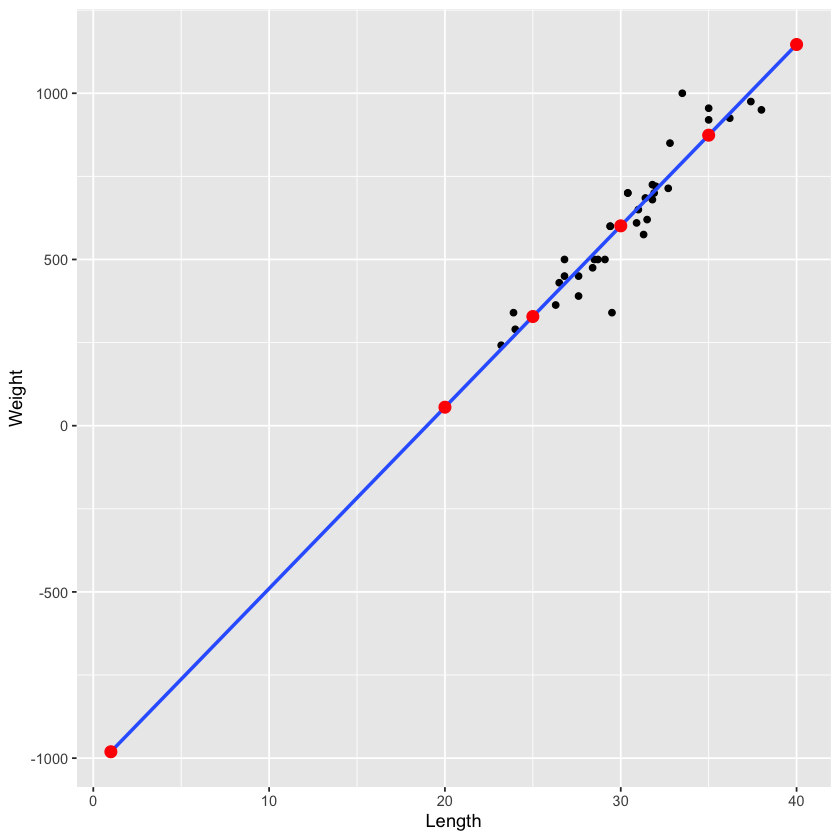

In [21]:
ggplot(bream_weight, aes(x=Length, y=Weight))+
  geom_point() + 
  geom_smooth(formula = y ~ x,method="lm", se=FALSE, fullrange=TRUE) + 
  geom_point(data=prediction_data, color="red", size = 3)
# note the aes will be inherited by all layouts so no need to include it gain.  

### Why did we subset the data?



* Why not the model on the complete dataset? 
  * Why not model is all species?

```R 
lm(Weight~ Length, fish_data)
```

In [76]:
mean(fish_data$Weight)

[1] 398.3264

In [22]:
erroneous_lm = lm(Weight~ Length, fish_data)
summary(erroneous_lm)
# notice that R-squared and the p-value are significantant. Does it mean that the model is good?


Call:
lm(formula = Weight ~ Length, data = fish_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-414.90  -71.26    6.08   98.31  363.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -462.375     32.243  -14.34   <2e-16 ***
Length        32.792      1.148   28.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 144.3 on 157 degrees of freedom
Multiple R-squared:  0.8385,	Adjusted R-squared:  0.8375 
F-statistic: 815.3 on 1 and 157 DF,  p-value: < 2.2e-16


### Why did we subset the data?



* The data contains three populations
  * Bream, Pike and Smelt
* Three varianances, therefore data will exhibit heteroscedasticity, which vialates one of the conditions of linear regression



In [161]:
sd((fish_data %>% filter(Species== "Bream"))$Length)

sd((fish_data %>% filter(Species== "Pike"))$Length)

sd((fish_data %>% filter(Species== "Smelt"))$Length)

[1] 3.593699

[1] 9.029087

[1] 1.216372

### Inspecting the Residuals

* Note that the residuals summary does not point to uniformly distributed residuals

```
Residuals:
    Min      1Q  Median      3Q     Max 
-414.90  -71.26    6.08   98.31  363.84 
```

In [184]:
# residulas of all the points in the dataset
residuals(erroneous_lm)

1           2           3           4           5           6 
 -56.403123  -34.636854   18.642362  -37.058831   23.382736   33.545087 
          7           8           9          10          11          12 
  83.545087  -52.688644    7.311356   27.798408    6.077625   21.239975 
         13          14          15          16          17          18 
   8.123110 -164.993756   98.285461   98.285461  165.493297  165.493297 
         19          20          21          22          23          24 
  59.097215   95.817998   10.980349  117.701133   49.421916   99.584267 
         25          26          27          28          29          30 
 116.305051  144.584267  133.025834  104.071320  236.792103  363.837589 
         31          32          33          34          35          36 
 234.649343  269.649343  200.298746  210.948149  166.272851   79.356165 
         37          38          39          40          41          42 
  -9.695625  -33.487789  -47.442304  -27.559169 -160.676035  -53.955251 
         43          44          45          46          47          48 
 -53.792900  -56.585064  -64.864281  -49.864281  -86.260363  -69.539579 
         49          50          51          52          53          54 
 -90.052527  -98.052527  -62.331743 -131.519989  -34.636854  -85.429018 
         55          56          57          58          59          60 
-114.993756  -41.519989  -57.916071  -71.104317   67.798408  157.279156 
         61          62          63          64          65          66 
 239.227366   74.680867   53.447135   17.862808    8.512211    8.999263 
         67          68          69          70          71          72 
 -20.676035    9.323965  -41.909766  -32.818795  -18.844690  -24.636854 
         73          74          75          76          77          78 
 222.333850   84.473030   49.843217   21.992621   17.538106   31.142024 
         79          80          81          82          83          84 
 -10.533274  -21.650140  -36.325438  -49.442304  -50.676035  -45.676035 
         85          86          87          88          89          90 
 -35.676035  -40.513684  -73.468199  -73.468199  -63.468199  -58.468199 
         91          92          93          94          95          96 
 -83.468199  -79.864281  -59.864281  -71.422713  -76.260363  -72.656445 
         97          98          99         100         101         102 
 -34.052527 -114.052527  -90.727825 -111.844690 -111.240772 -139.429018 
        103         104         105         106         107         108 
 -63.987451 -110.545884 -105.545884 -120.545884 -136.941966 -119.734130 
        109         110         111         112         113         114 
-129.247077  -23.785920  -30.974166  236.629753   32.441507   47.441507 
        115         116         117         118         119         120 
  31.045425   17.766208  165.461097  -84.538903   82.181881  102.344231 
        121         122         123         124         125         126 
 149.065015  264.065015   65.785799  283.480687  157.246956  247.409307 
        127         128         129         130         131         132 
 144.130091  114.617143 -321.389838 -277.136516 -309.928680 -378.792224 
        133         134         135         136         137         138 
-271.746739 -373.142821 -393.311477 -339.311477 -312.590693 -414.895804 
        139         140         141         142         143         144 
-387.246401 -236.713863 -171.486437    7.182557  226.013901  176.013901 
        145         146         147         148         149         150 
 177.637409  164.107955  141.953440  138.174224  131.036575  121.298925 
        151         152         153         154         155         156 
 116.919709  101.823627  101.723627   98.344411   97.465194   92.106762 
        157         158         159 
  77.789896   49.218516   29.743217

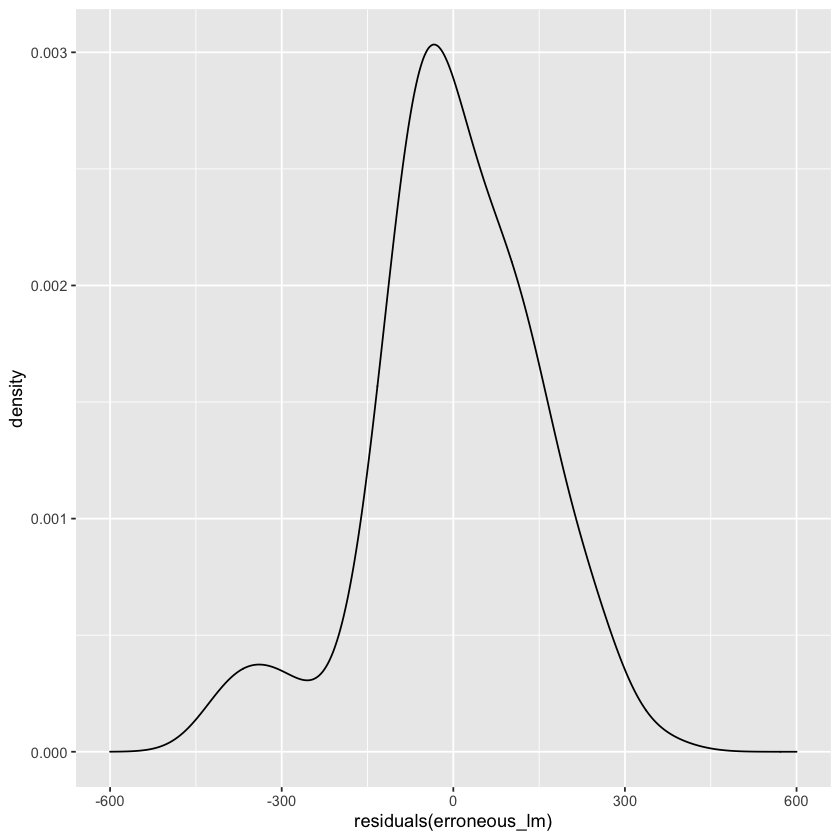

In [182]:
ggplot()+
   geom_density(aes(x=residuals(erroneous_lm)), bw=55) +
   xlim(-600, 600)


### Why did we Subset the Data? Conclusion

* If you suspect that your data contains populations, then using a linear regression without accounting for the population structure is a poor idea
  * Adding the population (here Species) as an explanatory variable would adjust for the observed differences across population
 * We would be saying that Weight is a function of Length and Species
  * How do we include the Species variable or any other categorical variable in our Model?


### Modeling with Categorical Variables
* Also called qualitative variables 
  * Represent a collection of two or more categories
* The values are not readily usable in a regression
  * Even when the categorical encoding is numeric


### Encoding of a Categorical Variable in R: Factors

* Factors are used to represent categorical data. 
  * Factors in R are integers but provide special behavior
  * Not equivalent to an integer encoding

* The factor's values are called levels


In [78]:
sex  = c("male", "female", "female", "male")
weight = c(12.2, 9.5, 11.1, 14)
data = tibble(sex, weight)
data


sex,weight
<chr>,<dbl>
male,12.2
female,9.5
female,11.1
male,14.0


In [27]:
sex  = factor(c("male", "female", "female", "male"))
weight = c(12.2, 9.5, 11.1, 14)
data = tibble(sex, weight)
data


sex,weight
<fct>,<dbl>
male,12.2
female,9.5
female,11.1
male,14.0


In [28]:
levels(data$sex)

[1] "female" "male"

In [29]:
nlevels(data$sex)

[1] 2

In [30]:
nlevels(data$sex)

[1] 2

In [31]:
weights_data = read_tsv(
                        "data/weights.tsv",
                        col_types = cols("sex" = col_factor(),"weight" = col_double())
                       )


weights_data

sex,weight
<fct>,<dbl>
male,17.8
female,13.2
female,15.8
male,17.3
female,10.2
female,12.1
female,10.8
male,15.9
male,15.2


In [32]:
# this will work even if sex is not a factor
# R will coerce it into a factor for the purpose
# of this operation

lm(weight~sex, weights_data)


Call:
lm(formula = weight ~ sex, data = weights_data)

Coefficients:
(Intercept)    sexfemale  
     16.513       -3.857  


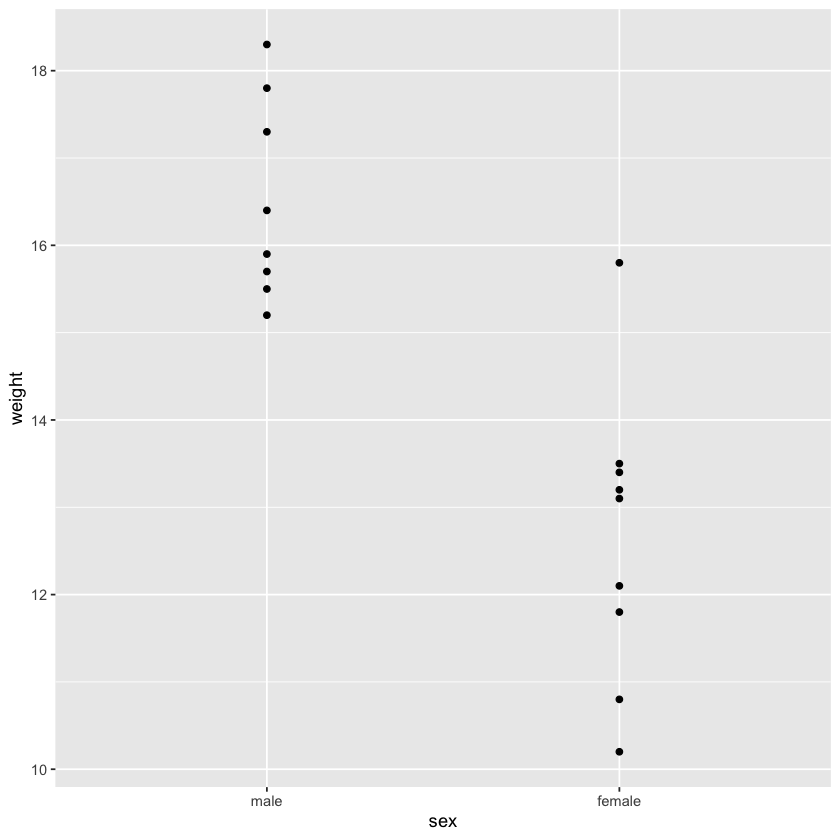

In [33]:
ggplot(data=weights_data)+
  geom_point(aes(x=sex, y=weight))


### Interpretation in Simple linear Regression

* Recall that in the absence of any other explanatory variable, the mean is the best predictor 

* Here, we modeled the weight as a function of the explanatory variable by taking the mean for each category
    
  * We can compute the mean the traditional way or using a shorter `dplyr`-specific way to do it.

In [34]:
weights_data[weights_data$sex == "male", ]

sex,weight
<fct>,<dbl>
male,17.8
male,17.3
male,15.9
male,15.2
male,16.4
male,15.7
male,15.5
male,18.3


In [35]:
weights_data[weights_data$sex == "male", ]$weight

[1] 17.8 17.3 15.9 15.2 16.4 15.7 15.5 18.3

In [36]:
mean(weights_data[weights_data$sex == "male", ]$weight)

[1] 16.5125

In [37]:
mean(weights_data[weights_data$sex == "female", ]$weight)

[1] 12.65556

In [39]:
# Another, more "readable" approach using the filter function

male_data = weights_data %>% filter(sex == "male")
mean(male_data$weight)

[1] 16.5125

In [16]:
female_data = weights_data %>% filter(sex == "female")
mean(female_data$weight)

[1] 12.65556

### Usign `dplyr`'s' `group_by `

* `group_by` is a useful function to group data based on a factor's levels
  * Takes one of more `factor` columns on which to group
  * Results in a group_by `Tibble` where operation can be applied to each group
  * Note that printing the `Tibble` does not show anything different
* For example:

```R
weights_data %>% group_by(sex)
```


In [18]:
weights_data %>% group_by(sex)

sex,weight
<fct>,<dbl>
male,17.8
female,13.2
female,15.8
male,17.3
female,10.2
female,12.1
female,10.8
male,15.9
male,15.2


In [47]:
weights_data %>% group_by(sex) %>% group_rows


<list_of<integer>[2]>
[[1]]
[1]  1  4  8  9 10 13 14 15

[[2]]
[1]  2  3  5  6  7 11 12 16 17

### Usign `dplyr`'s' `summarize` 

* `summarize` is a useful function that can take a function as input and use it to summarize a group of group_by Tibble
    
* For example:

```R
weights_data %>% group_by(sex) %>% summarize(head(weight, 2), .groups='keep')
```

* the `.groups = 'keep'` is not required. It's used to avoid an annoying warning that informs the users that the groups were dropped.

In [53]:
weights_data %>% group_by(sex) %>% summarize(head(weight, 3), .groups='keep')

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


sex,"head(weight, 3)"
<fct>,<dbl>
male,17.8
male,17.3
male,15.9
female,13.2
female,15.8
female,10.2


In [54]:
weights_data %>% group_by(sex) %>% summarize(head(weight, 2),  .groups="keep")

sex,"head(weight, 2)"
<fct>,<dbl>
male,17.8
male,17.3
female,13.2
female,15.8


In [55]:
weights_data %>% group_by(sex) %>% summarize(mean_weight = mean(weight),  .groups="keep")

sex,mean_weight
<fct>,<dbl>
male,16.51250
female,12.65556


### Using a Categorical Variable in the Regression

* What does it mean to use a categorical variable in a regression

* The following explanation is no longer applicable

$$
weight = intercept + slope * sex
$$

* Instead the following interpretation is used

$$
weight = lvl\_1\_status * \mu_{lvl\_1} + lvl\_2\_status * \mu_{lvl\_2} + \ldots
$$

  * Where $lvl\_i\_status$ is either 0 or 1.
    * it's a status indicator


### Rewriting the Equation Without the Intercept

* Avoid negative values using the following notation

```R
lm(weight ~ sex + 0 , weights_data)
```

In [23]:
lm(weight ~ sex + 0 , weights_data)


Call:
lm(formula = weight ~ sex + 0, data = weights_data)

Coefficients:
  sexmale  sexfemale  
    16.51      12.66  


### Transforming Variables

* Some data may appear to follow some non-linear pattern

* Example: quadratic, or exponential curve

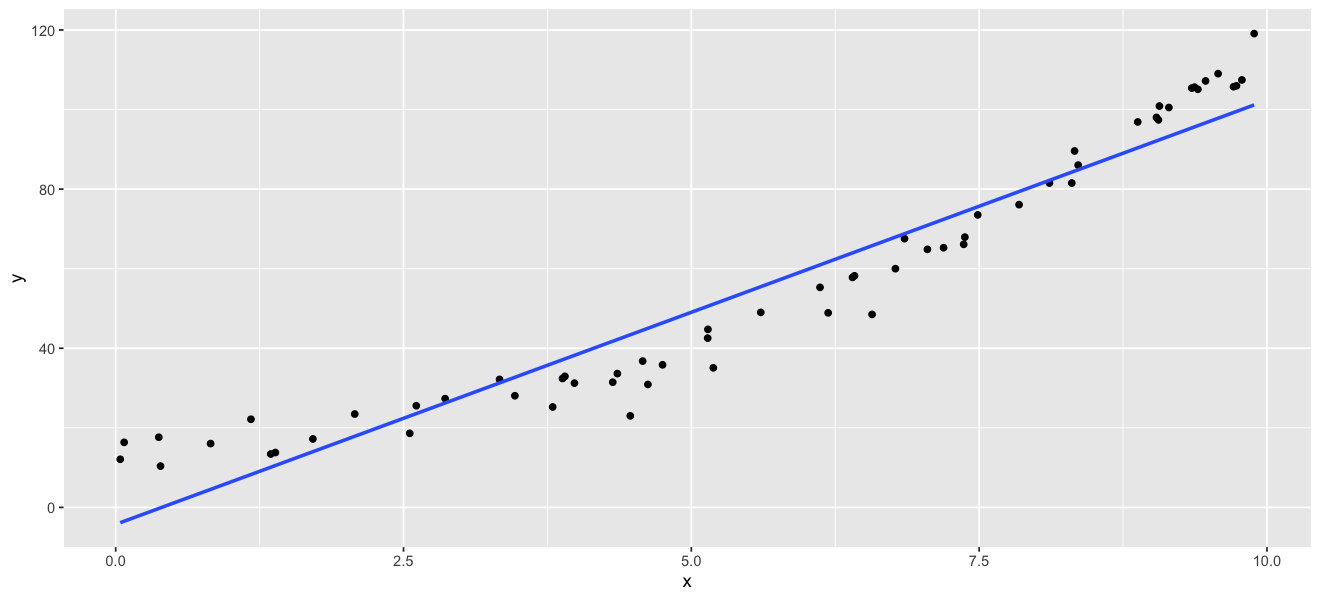

In [61]:
options(repr.plot.width=11, repr.plot.height=5)

set.seed(42)
x = runif(60, 0, 10)
y = x^2 + rnorm(60, 15, 4)

ggplot()+
  geom_point(aes(x, y)) + 
  geom_smooth(aes(x, y), formula='y ~ x', method="lm", se=FALSE)




### Variable Transformation

* Above we generate $y$ such that $y=x^2$

  * This is a quadratic curve
  

* Plotting $x$ versus $y$ will show a curve

$x = \text{c}(1,2,3,4) \implies y = \text{c}(1,4,9, 16)$


* However, plotting $x^2$ against $y$ will show a line since both are equal

$x^2 = \text{c}(1,4,9, 16)$
$y = \text{c}(1,4,9, 16)$


  
  
  
  

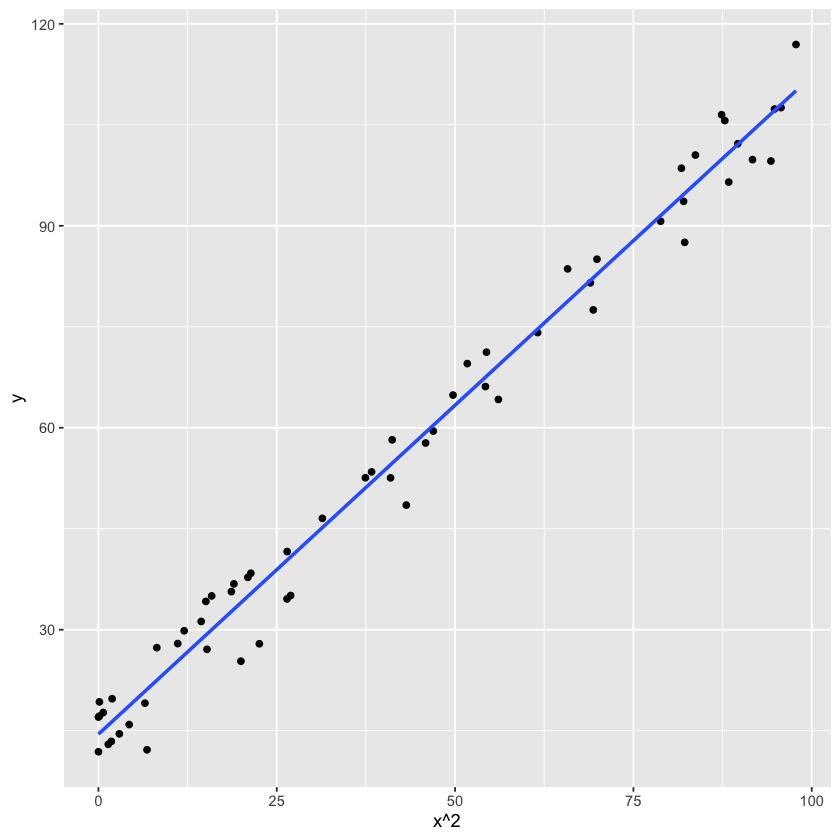

In [56]:
# y since y = x^2, 
#    the the plot x versus y will appear convex
# h

set.seed(42)
x = runif(60, 0, 10)
y = x^2 + rnorm(10, 15, 4)

ggplot()+
  geom_point(aes(x^2, y)) + 
  geom_smooth(aes(x^2, y), formula='y ~ x', method="lm", se=FALSE)


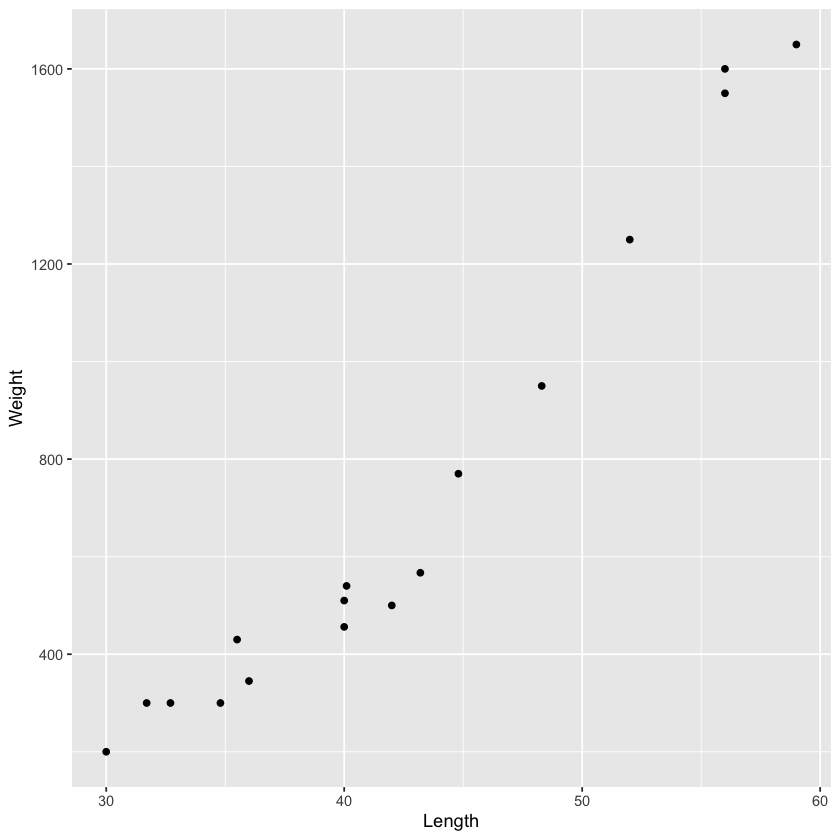

In [57]:
### The plot for Pike exhibits a similar trend
Pike_weight = fish_data %>% filter(Species== "Pike")
ggplot(Pike_weight, aes(x=Length, y=Weight))+
  geom_point()


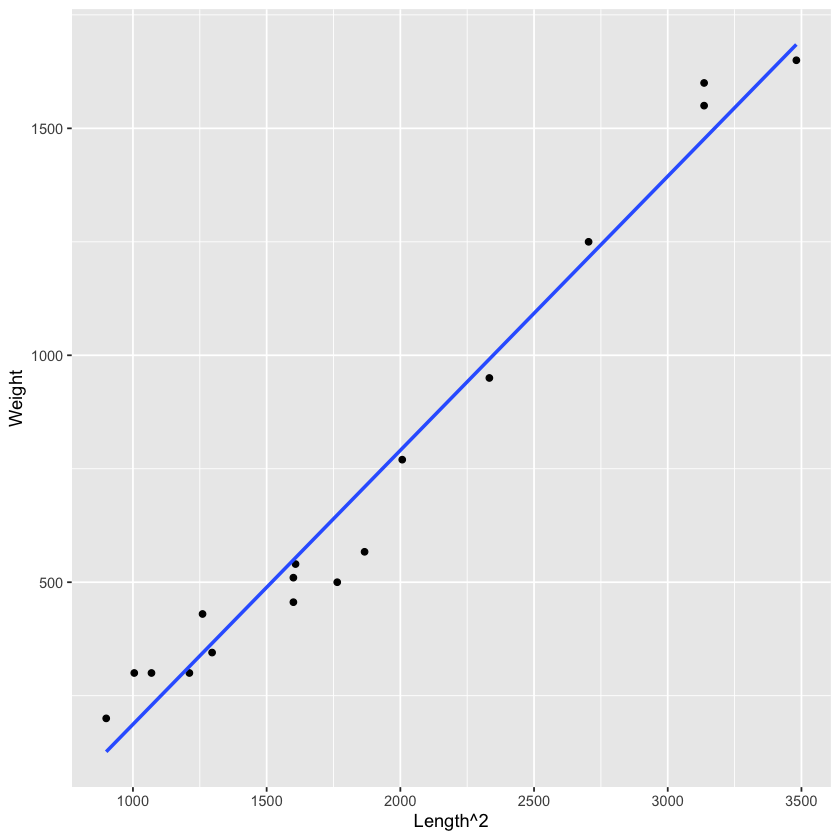

In [58]:
### The plot for Pike exhibits a similar trend
Pike_weight = fish_data %>% filter(Species== "Pike")
ggplot(Pike_weight, aes(x=Length^2, y=Weight))+
  geom_point() + 
  geom_smooth(formula='y ~ x', method="lm", se=FALSE)




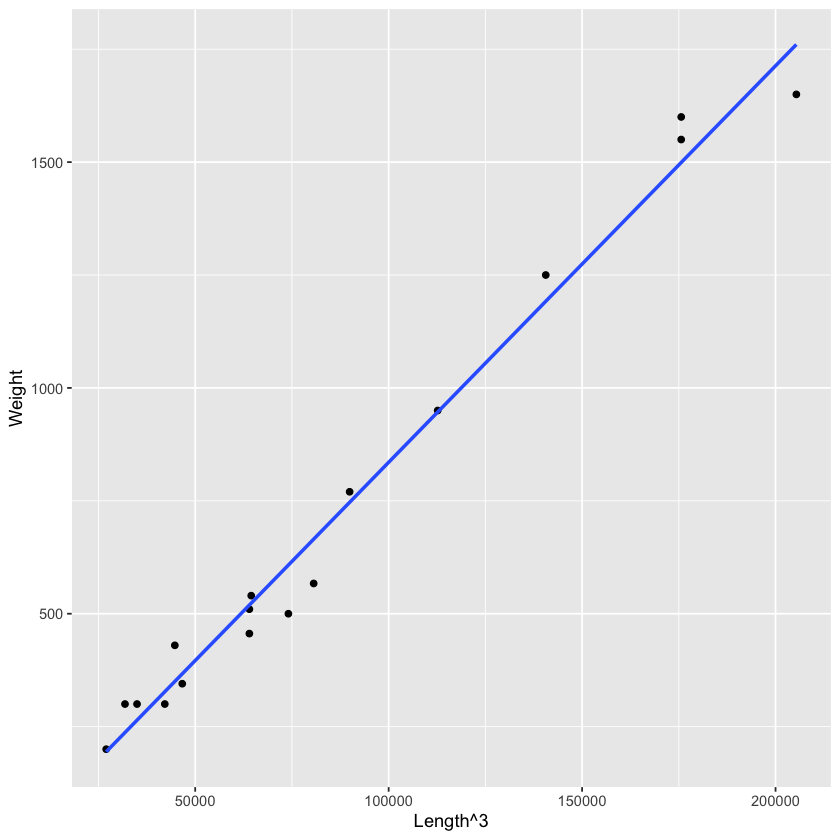

In [32]:
### The plot for Pike exhibits a similar trend
Pike_weight = fish_data %>% filter(Species== "Pike")
ggplot(Pike_weight, aes(x=Length^3, y=Weight))+
  geom_point() + 
  geom_smooth(formula='y ~ x', method="lm", se=FALSE)




### Variable change

* Modeling with a variable change requires a different formula

* We use `I()`, which tells R to execute the computation inside it prior to modeling
  * 'I()' is also called the `as is` function
* The new model is:
```R
lm(Weight ~ I(Length^3), Pike_weight)
```

In [59]:
model_original  = lm(Weight ~ Length, Pike_weight)
sum(residuals(model_original) **2)

model_transformed  = lm(Weight ~ I(Length^3), Pike_weight)
sum(residuals(model_transformed) **2)

[1] 215775.6

[1] 67387.3

### Transoforming $X$ and $Y$.

* Transformations can be applied to explanatory and/or outcome variables.

 * Any transformation that improves linearity can be used.


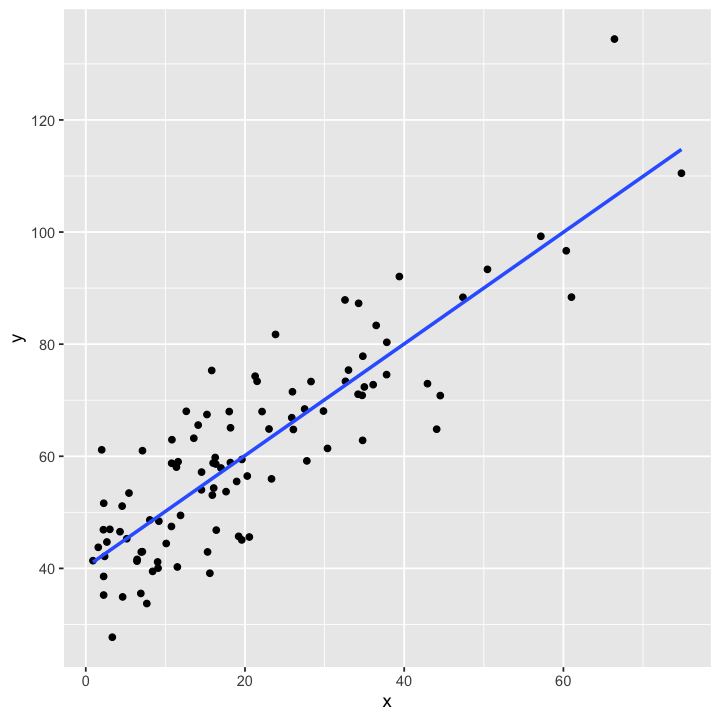

In [60]:
options(repr.plot.width=6, repr.plot.height=6)

set.seed(42)
x = abs(rnorm(100, 0, 25))
y = 40 + x + rnorm(100, 1, 10)


ggplot()+
  geom_point(aes(x, y)) + 
  geom_smooth(aes(x, y), formula='y ~ x', method="lm", se=FALSE)


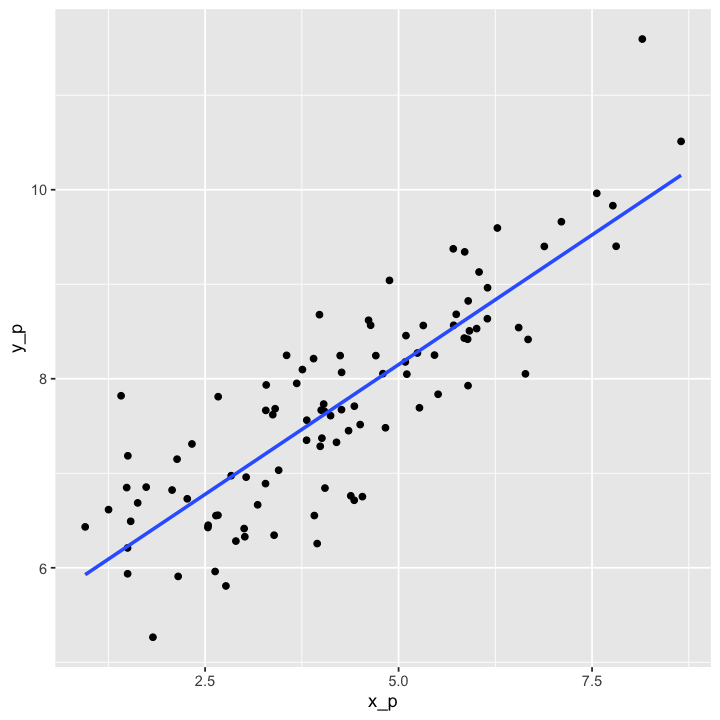

In [34]:
options(repr.plot.width=6, repr.plot.height=6)

set.seed(42)
x = abs(rnorm(100, 0, 25))
y = 40 + x + rnorm(100, 1, 10)



x_p = sqrt(x)
y_p = sqrt(y)

ggplot()+
  geom_point(aes(x_p, y_p)) + 
  geom_smooth(aes(x_p, y_p), formula='y ~ x', method="lm", se=FALSE)
  


### Assessing the Fit


* Usually, the most telling feature about the model fit is the residuals.
  * Recall that the residuals are the errors in the model.

1. Large RSE (Residual Standard Error), which in the units of the outcomes should be small
  * Large values of RSE, means that we're not predicting well. 
  * If average fish weight is 100g but the RSE is, say, 90g, then the prediction is very poor 
    * We are making predictions that have, on average, an error of ~90g.
2. Earlier, we said that the distribution of residuals should be normal. Another way to visualize this is through the fitted values versus residuals plot
 * X-axis is fitted values
 * Y-Axis is residual.
 * Assumptions is that residuals should have the same variance around the mean


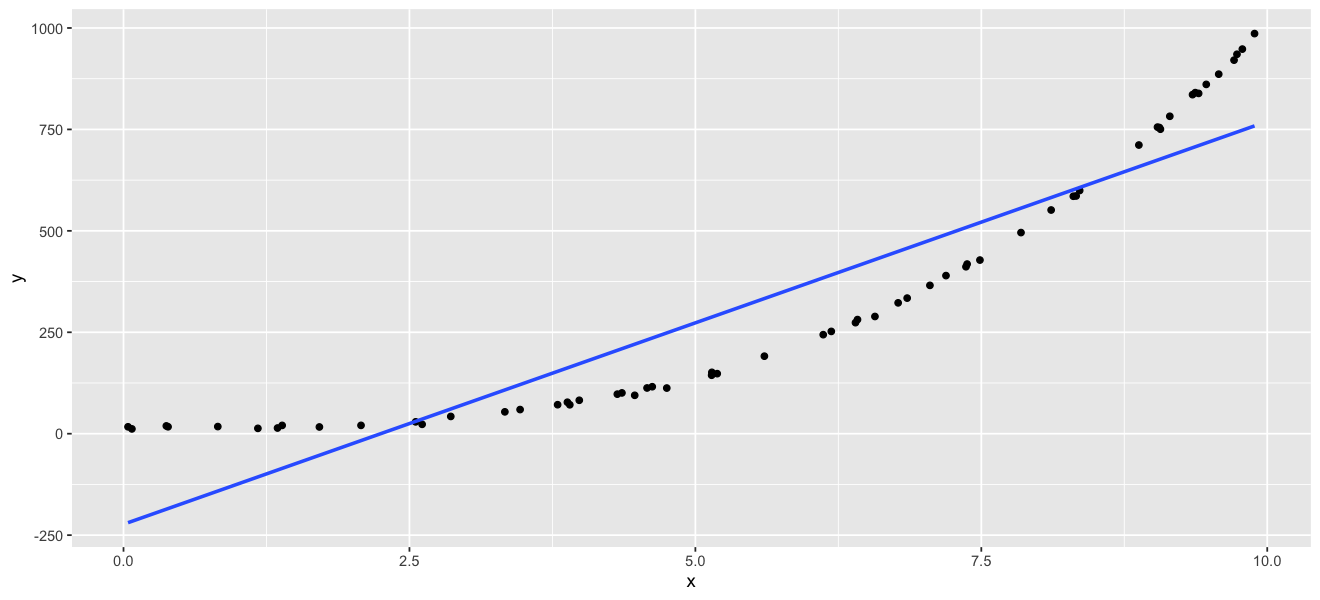

In [65]:
options(repr.plot.width=11, repr.plot.height=5)

set.seed(42)
x = runif(60, 0, 10)
y = x^3 + rnorm(10, 15, 4)

ggplot()+
  geom_point(aes(x, y)) + 
  geom_smooth(aes(x, y), formula='y ~ x', method="lm", se=FALSE)

In [66]:
lm_unadjusted = lm(y~x)
lm_adjusted = lm(y~I(x^3))


In [67]:
summary(lm_unadjusted)



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-144.19 -113.04  -24.54  109.41  236.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -223.192     35.345  -6.315 4.11e-08 ***
x             99.287      5.494  18.073  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 126.8 on 58 degrees of freedom
Multiple R-squared:  0.8492,	Adjusted R-squared:  0.8466 
F-statistic: 326.6 on 1 and 58 DF,  p-value: < 2.2e-16


In [68]:
summary(lm_adjusted)


Call:
lm(formula = y ~ I(x^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8599 -2.6275  0.7325  3.3605  6.9434 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.240711   0.785269   18.14   <2e-16 ***
I(x^3)       0.997887   0.001706  585.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.249 on 58 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 3.423e+05 on 1 and 58 DF,  p-value: < 2.2e-16


In [69]:
summary(lm_unadjusted)
print("============================================")
print("============================================")
summary(lm_adjusted)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-144.19 -113.04  -24.54  109.41  236.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -223.192     35.345  -6.315 4.11e-08 ***
x             99.287      5.494  18.073  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 126.8 on 58 degrees of freedom
Multiple R-squared:  0.8492,	Adjusted R-squared:  0.8466 
F-statistic: 326.6 on 1 and 58 DF,  p-value: < 2.2e-16


[1] "============================================"
[1] "============================================"



Call:
lm(formula = y ~ I(x^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8599 -2.6275  0.7325  3.3605  6.9434 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.240711   0.785269   18.14   <2e-16 ***
I(x^3)       0.997887   0.001706  585.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.249 on 58 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 3.423e+05 on 1 and 58 DF,  p-value: < 2.2e-16


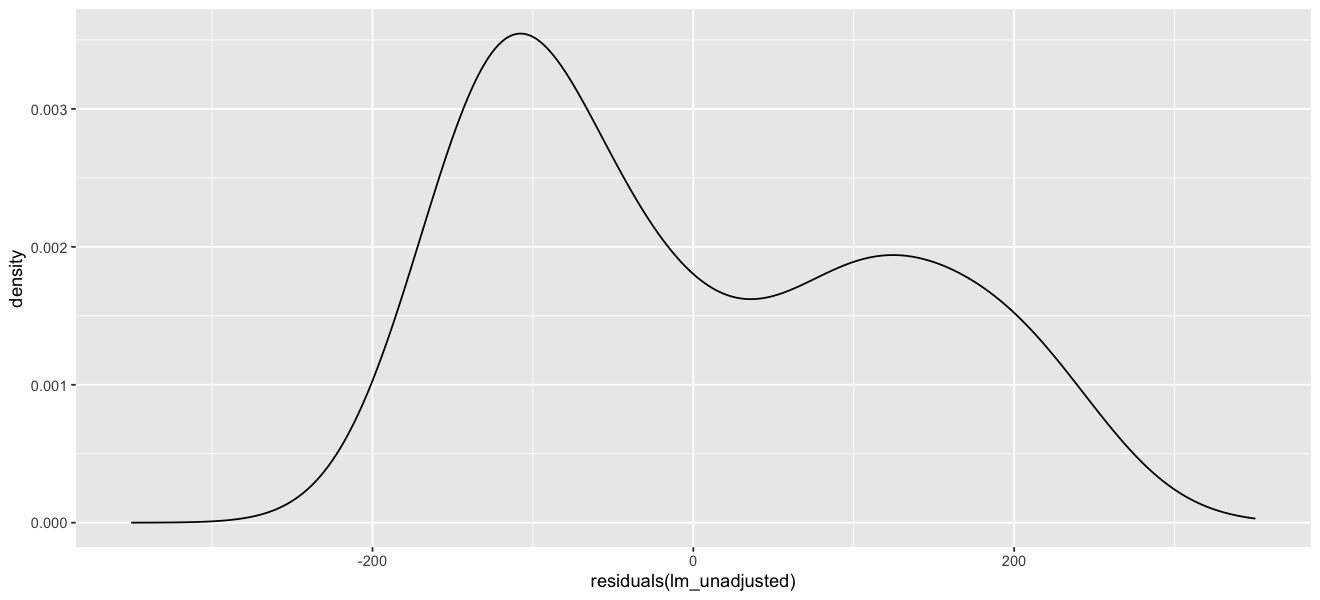

In [70]:
ggplot()+
   geom_density(aes(x=residuals(lm_unadjusted)), bw=50) +
   xlim(-350, 350)


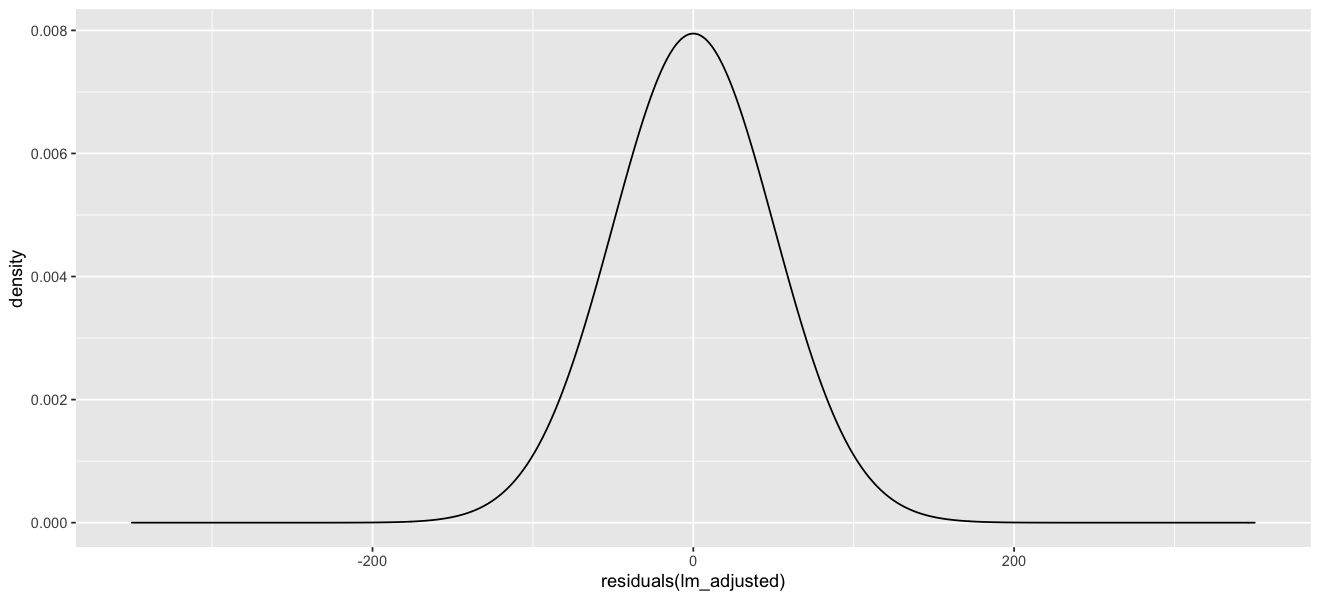

In [71]:
ggplot()+
   geom_density(aes(x=residuals(lm_adjusted)), bw=50) +
   xlim(-350, 350)


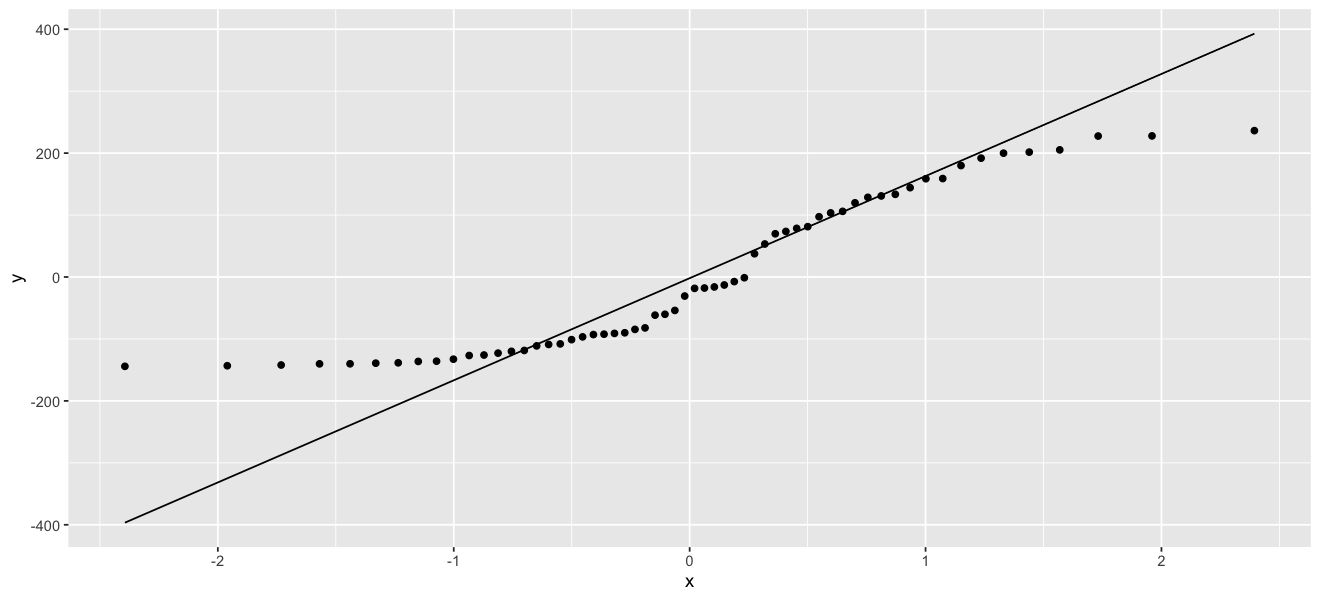

In [72]:
res_data = tibble(res = residuals(lm_unadjusted))
ggplot(res_data, aes(sample=res))+
  geom_qq() + 
  stat_qq_line()

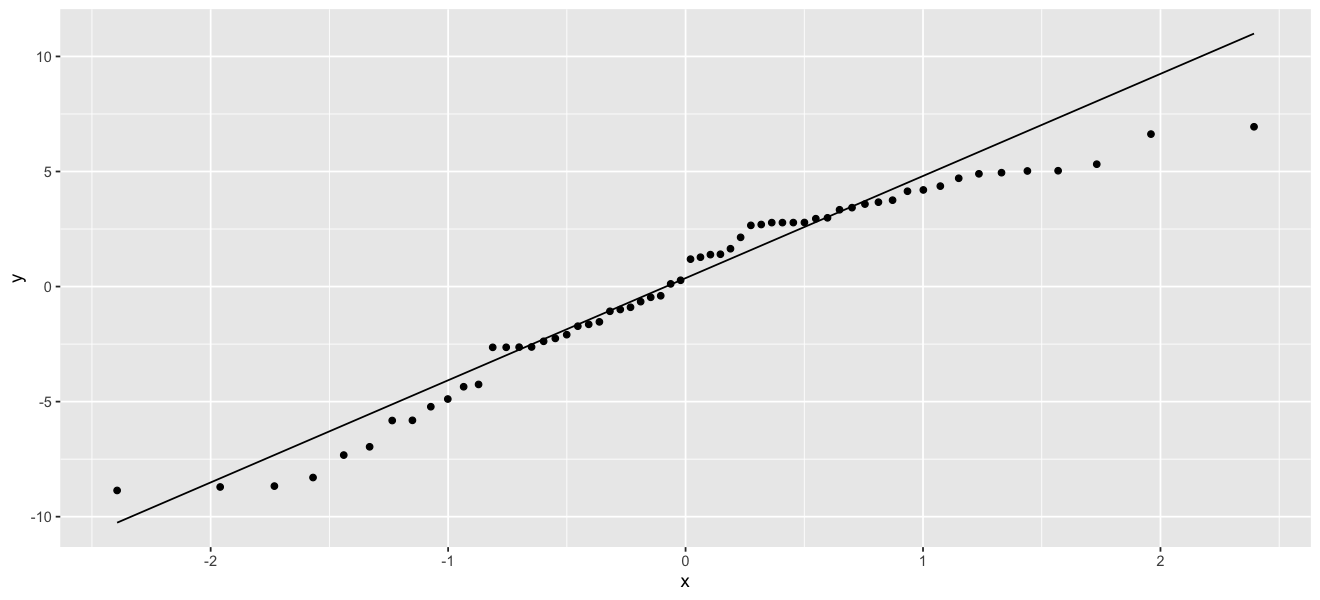

In [73]:
res_data = tibble(res = residuals(lm_adjusted))
ggplot(res_data, aes(sample=res))+
  geom_qq() + 
  stat_qq_line()

`geom_smooth()` using formula 'y ~ x'



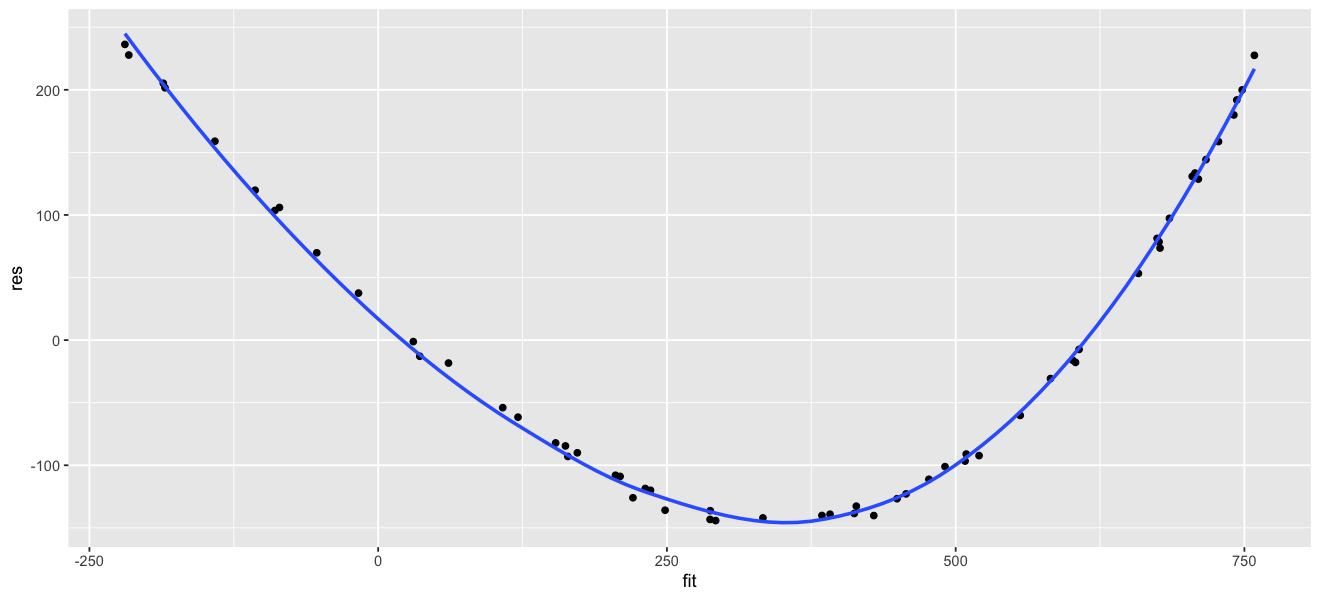

In [74]:
res_data = tibble(res = residuals(lm_unadjusted), fit=fitted(lm_unadjusted))
ggplot(res_data, aes(x=fit, y=res)) + 
 geom_point() +
 geom_smooth(method="loess", se=FALSE)

`geom_smooth()` using formula 'y ~ x'



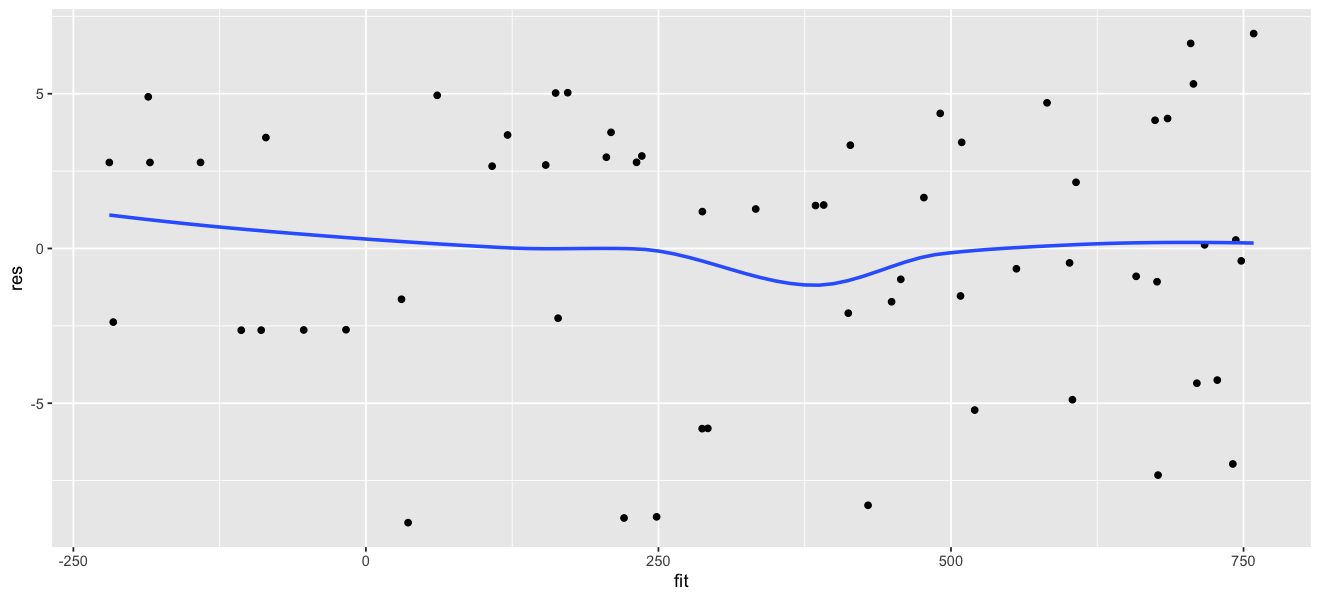

In [75]:
res_data = tibble(res = residuals(lm_adjusted), fit=fitted(lm_unadjusted))
ggplot(res_data, aes(x=fit, y=res)) + 
 geom_point() +
 geom_smooth(method="loess", se=FALSE)

### Automatically Generating Diagnostic Plots

* You can generate the diagnostic plots using the `ggfortify` library

```R
library(ggfortify)
autoplot(model, which=?)
```

1. residuals vs. fitted values
2. Q-Q plot
3. Scale Location (Somewhat similar to the residuals)


In [76]:
install.packages("ggfortify")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



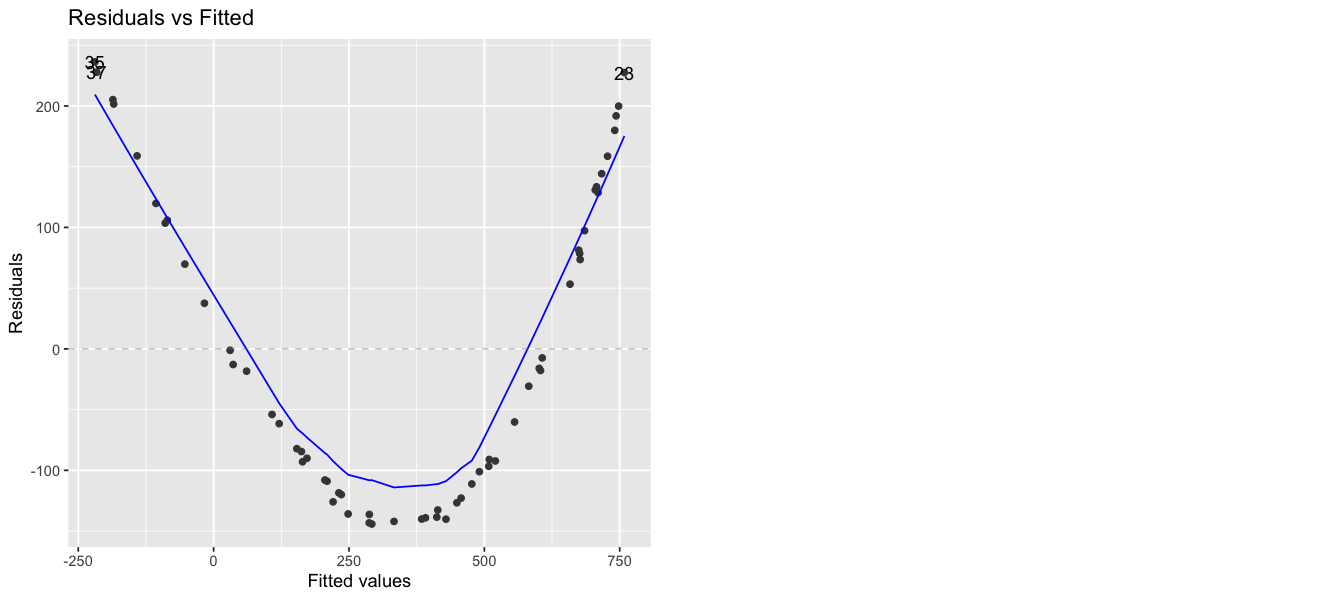

In [77]:
library(ggfortify)
autoplot(lm_unadjusted, which=1)


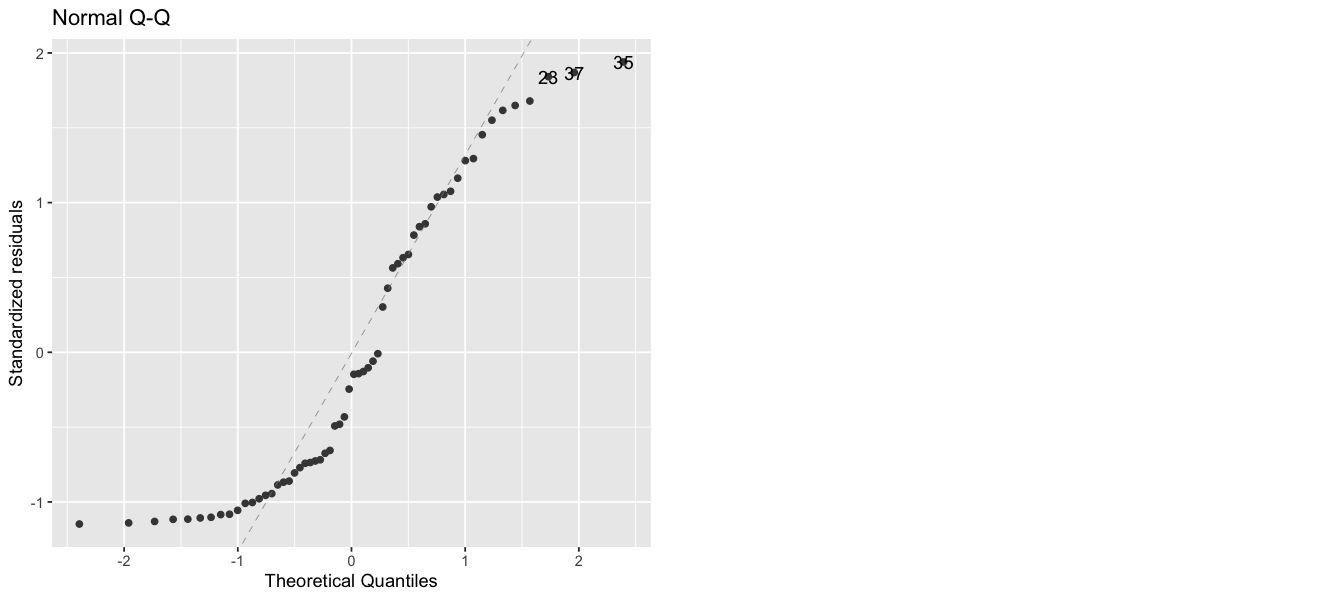

In [78]:
library(ggfortify)
autoplot(lm_unadjusted, which=2)


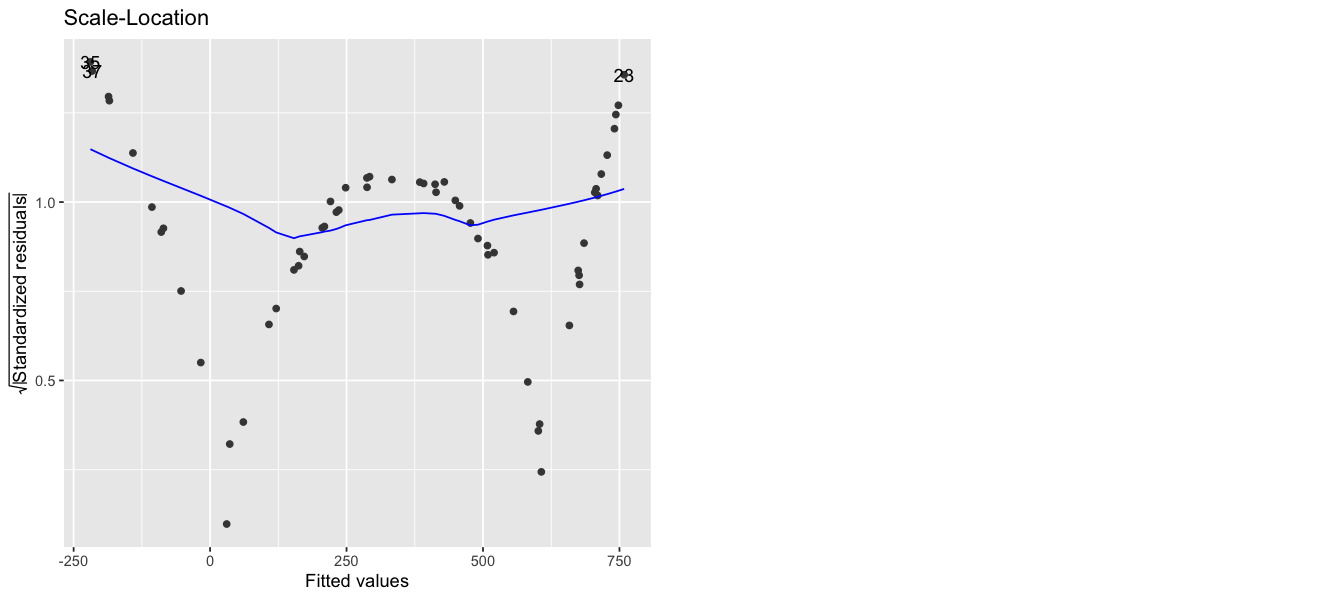

In [79]:
library(ggfortify)
autoplot(lm_unadjusted, which=3)


### Impact of Outliers

* Each explanatory point exerts some `leverage` (pull) on the linear regression
  * Measured using `hatvalues()`
* The influence determines the extent of the change in the model if a point is left out
  * Not all points with high leverage will have a large influence. 
    * Example: points that are far out but are on the regression line
  * Measured using `cooks.distance()`
* Both the leverage and influence points us towards potentially problematic observations

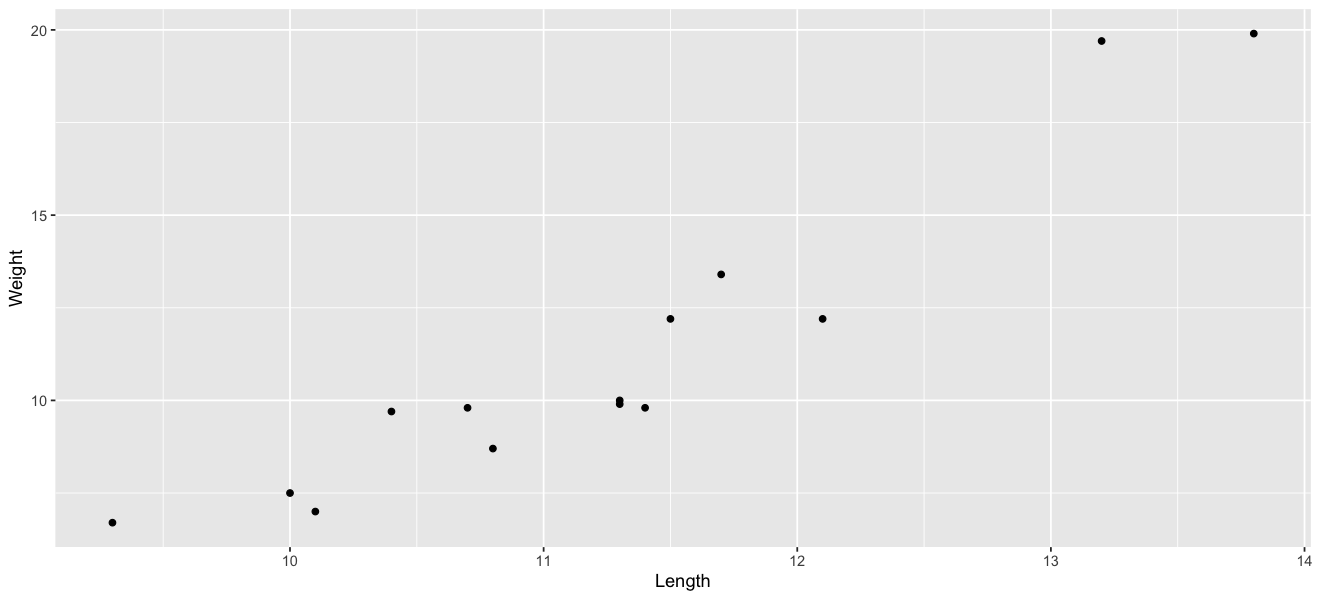

In [80]:
Smelt_weight = fish_data %>% filter(Species== "Smelt")
ggplot(Smelt_weight, aes(x=Length, y=Weight))+
  geom_point()


In [81]:
lm_smelt = lm(Weight~Length ,Smelt_weight)
leverage = hatvalues(lm_smelt)
leverage

1          2          3          4          5          6          7 
0.27057338 0.15359477 0.14104278 0.10962567 0.08756684 0.08229352 0.07152406 
         8          9         10         11         12         13         14 
0.07152406 0.07248960 0.07449495 0.08162507 0.10836304 0.26767677 0.40760547

In [82]:
tibble(length=Smelt_weight$Length, weight=Smelt_weight$Weight, leverage) %>% arrange(desc(leverage))

length,weight,leverage
<dbl>,<dbl>,<dbl>
13.8,19.9,0.40760547
9.3,6.7,0.27057338
13.2,19.7,0.26767677
10.0,7.5,0.15359477
10.1,7.0,0.14104278
10.4,9.7,0.10962567
12.1,12.2,0.10836304
10.7,9.8,0.08756684
10.8,8.7,0.08229352


In [59]:
influence = cooks.distance(lm_smelt)
tibble(length=Smelt_weight$Length, weight=Smelt_weight$Weight, leverage, influence) %>% arrange(desc(leverage))

length,weight,leverage,influence
<dbl>,<dbl>,<dbl>,<dbl>
13.8,19.9,0.40760547,0.088550472
9.3,6.7,0.27057338,0.448307389
13.2,19.7,0.26767677,0.681533605
10.0,7.5,0.15359477,0.007725705
10.1,7.0,0.14104278,0.010449264
10.4,9.7,0.10962567,0.060248711
12.1,12.2,0.10836304,0.103639261
10.7,9.8,0.08756684,0.004810585
10.8,8.7,0.08229352,0.026321735


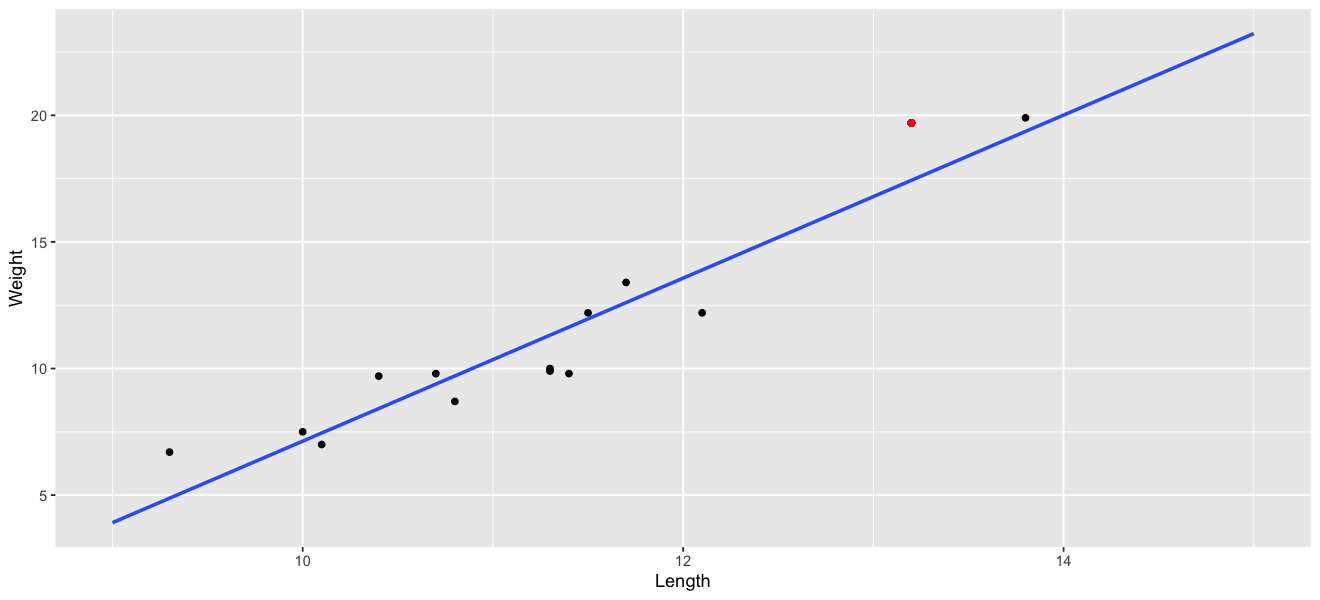

In [96]:
Smelt_weight = fish_data %>% filter(Species== "Smelt")
ggplot(Smelt_weight, aes(x=Length, y=Weight))+
  geom_point() + 
  geom_smooth( formula='y ~ x', method="lm", se=FALSE,fullrange=TRUE) + 
  geom_point(aes(x=13.2, y=19.7), color="red") + 
  xlim(9, 15)

